# 0) Initialization

## Predicting Boston Housing Prices
This is part of the Machine Learning Engineer Nanodegree.

In [129]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from matplotlib import style

%matplotlib inline
style.use('ggplot')
sns.set_color_codes('deep')

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Data
city_data = datasets.load_boston()
# As the names suggests.
housing_prices = city_data.target
housing_features = city_data.data

In [130]:
# Making Dataframes from the data
df_housing_prices = pd.DataFrame(housing_prices)
df_housing_features = pd.DataFrame(housing_features)

print "Housing Prices"
print df_housing_prices.head()
print "------------------------"
print "Housing Features"
print df_housing_features.head()

Housing Prices
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
------------------------
Housing Features
        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [131]:
# naming the columns...
l_features = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD",
              "TAX","PTRATIO","B","LSTAT"]

"""
Features and What they mean:

CRIM: Per capita crime rate by town',
'ZN: Proportion of residential land zoned',
'INDUS: Proportion of non-retail business acres per town',
'CHAS: If tract bounds Charles River',
'NOX: Nitric oxides concentration',
'RM: Average number of rooms per dwelling',
'AGE: Proportion of owner-occupied units prior to 1940',
'DIS: Weighted distances to five Boston employment centres',
'RAD: Index of accessibility to radial highways',
'TAX: Full-value property-tax rate',
'PTRATIO: Pupil-teacher ratio by town',
'B: Proportion of afro-americans by town',
'LSTAT: % lower status of the population'
"""
df_housing_features.columns = l_features
df_housing_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# 1) Data Exploration

In [132]:
# Number of houses in the dataset
total_houses = df_housing_features.shape[0]

# Number of features in the dataset
total_features = df_housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = df_housing_prices.min().values[0]

# Maximum housing value in the dataset
maximum_price = df_housing_prices.max().values[0]

# Mean house value of the dataset
mean_price = df_housing_prices.mean().values[0]

# Median house value of the dataset
median_price = df_housing_prices.median().values[0]

# Standard deviation of housing values of the dataset
std_dev = df_housing_prices.std(ddof=0).values[0]

# Show the calculated statistics
print "Boston Housing dataset statistics (in $10000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $10000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


### Question 1: Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.

In order for me to answer the question, I thought I would look at some graphs and use a correlation table

In [133]:
# Graphs
total_df = df_housing_features.join(df_housing_prices)
total_df.rename(columns = {0:"PRICE"}, inplace = True)
total_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [134]:
total_df.corr()['PRICE']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

### Here are the features and what they mean again
- CRIM: Per capita crime rate by town',
- 'ZN: Proportion of residential land zoned',
- 'INDUS: Proportion of non-retail business acres per town',
- 'CHAS: If tract bounds Charles River',
- 'NOX: Nitric oxides concentration',
- 'RM: Average number of rooms per house',
- 'AGE: Proportion of owner-occupied units prior to 1940',
- 'DIS: Weighted distances to five Boston employment centres',
- 'RAD: Index of accessibility to radial highways',
- 'TAX: Full-value property-tax rate',
- 'PTRATIO: Pupil-teacher ratio by town',
- 'B: Proportion of afro-americans by town',
- 'LSTAT: % lower status of the population'

## Conclusion for using Correlation Table to answer the Question:
RM: This tells us that the price is very correlated with the Average number of rooms per house.  
LSTAT: The thing that brings the price down the most is the % lower status of the population.  
PTRATIO: The third important feature thing looks like it will be Pupil teacher ratio by town.

I will plot them below for the graphs

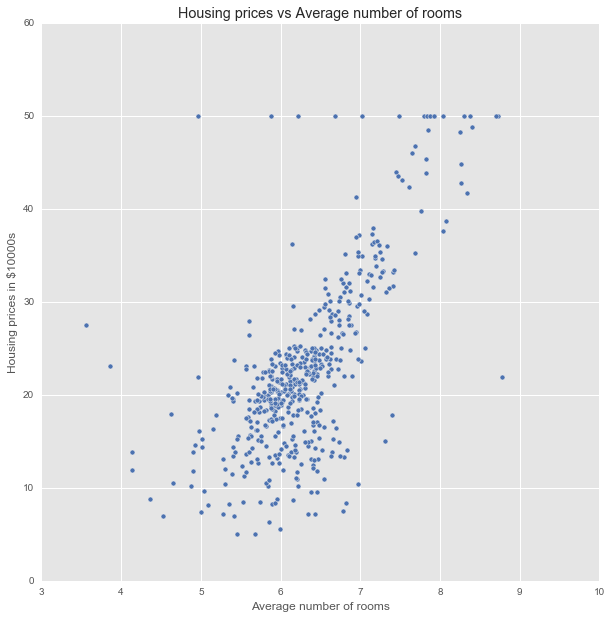

In [135]:
plt.figure(figsize = (10,10))
plt.scatter(city_data.data[:,5],city_data.target, s = 25)
plt.xlabel('Average number of rooms')
plt.ylabel('Housing prices in $10000s')
plt.title('Housing prices vs Average number of rooms')
plt.show()

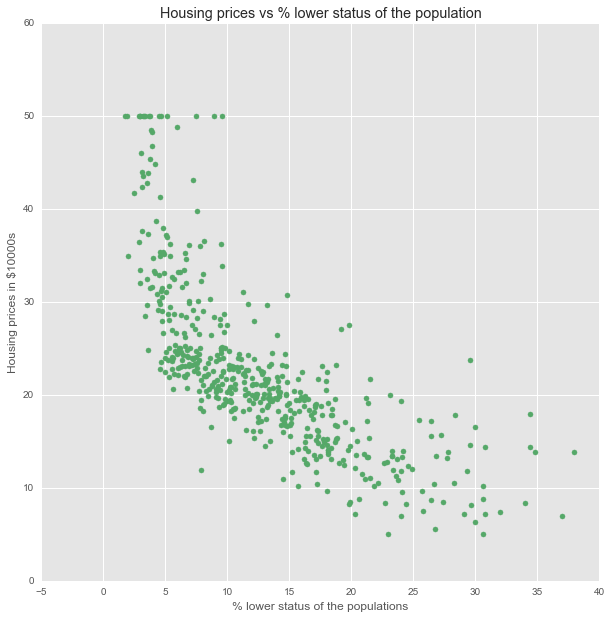

In [136]:
plt.figure(figsize = (10,10))
plt.scatter(city_data.data[:,12],city_data.target, color = 'g',s = 25)
plt.xlabel('% lower status of the populations')
plt.ylabel('Housing prices in $10000s')
plt.title('Housing prices vs % lower status of the population')
plt.show()

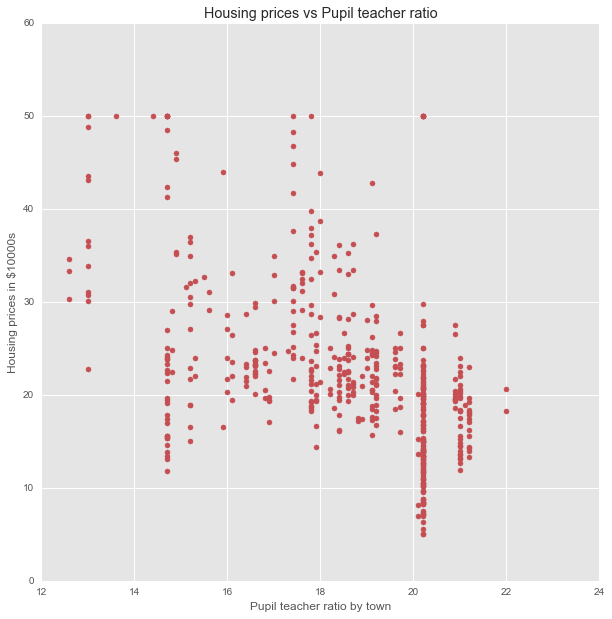

In [137]:
plt.figure(figsize = (10,10))
plt.scatter(city_data.data[:,10],city_data.target,color = 'r', s = 25)
plt.xlabel('Pupil teacher ratio by town')
plt.ylabel('Housing prices in $10000s')
plt.title('Housing prices vs Pupil teacher ratio')
plt.show()

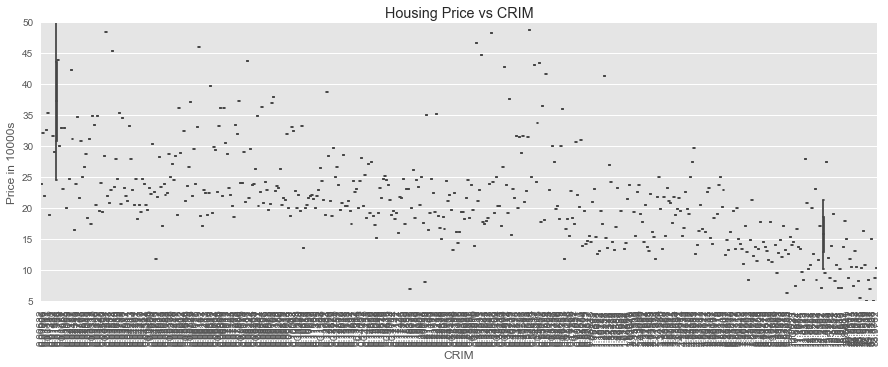

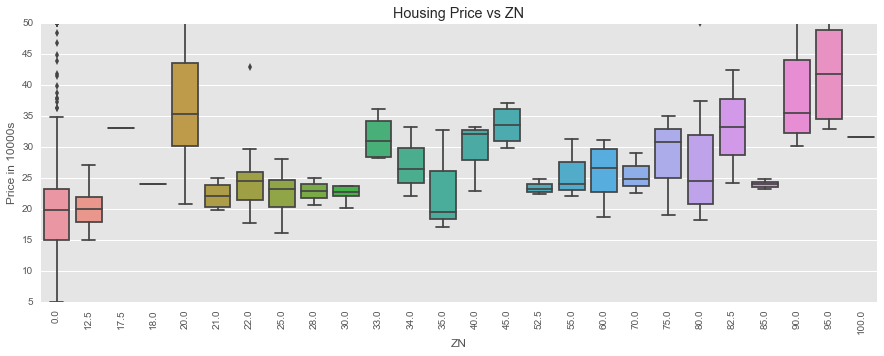

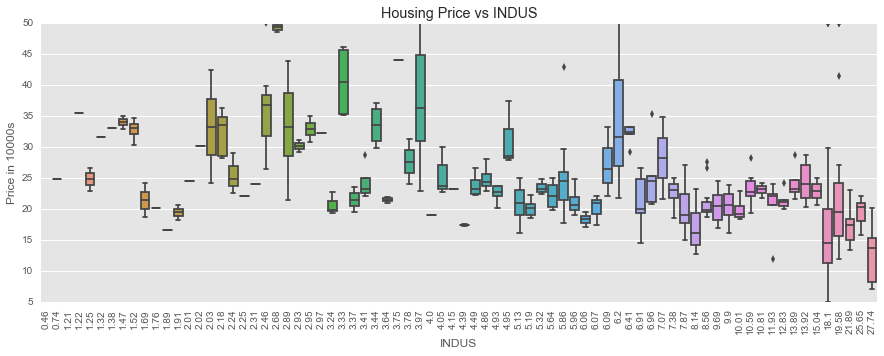

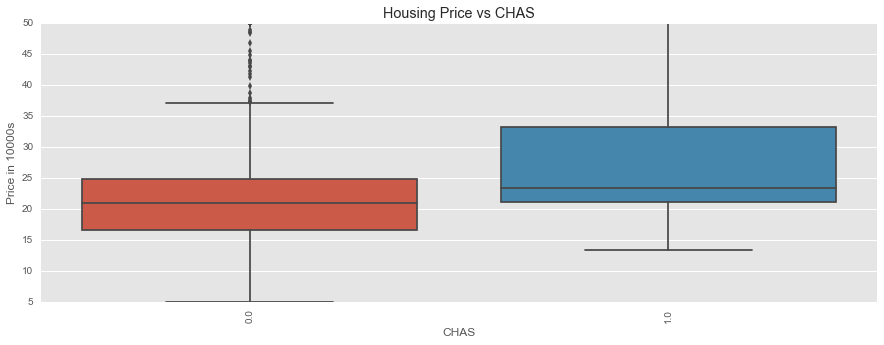

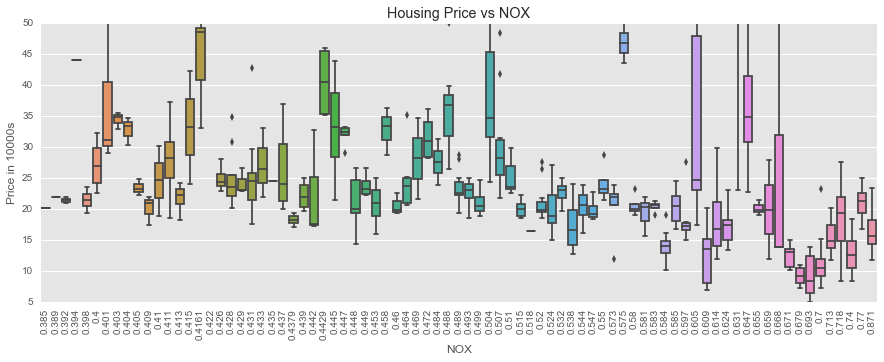

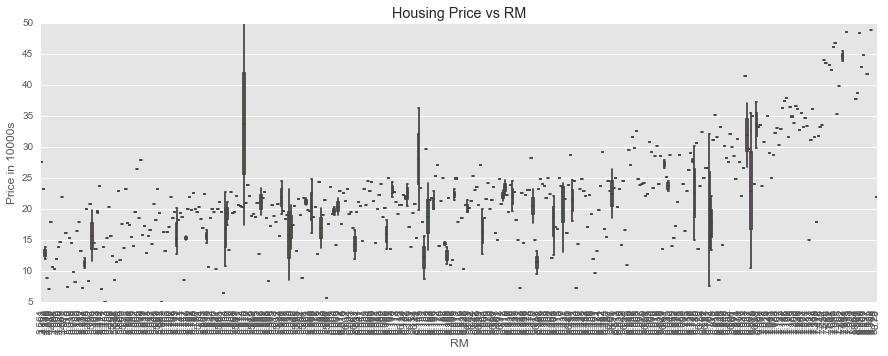

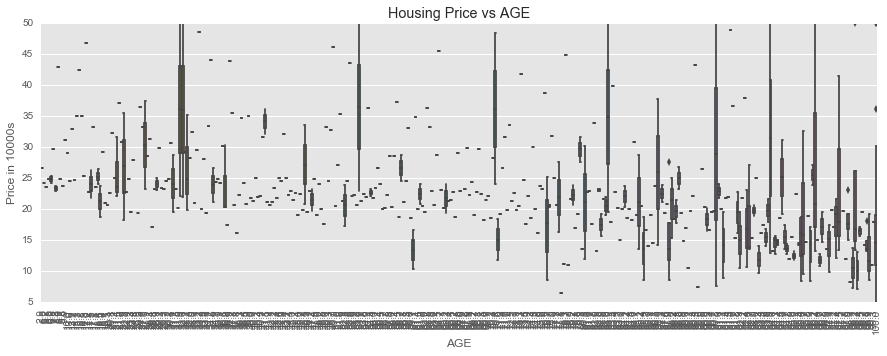

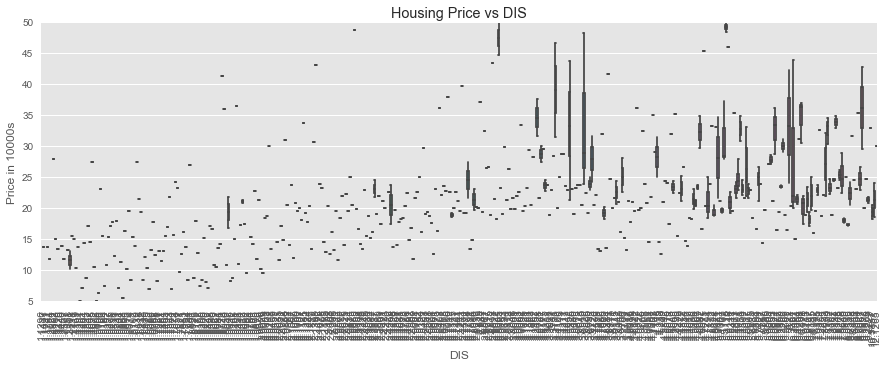

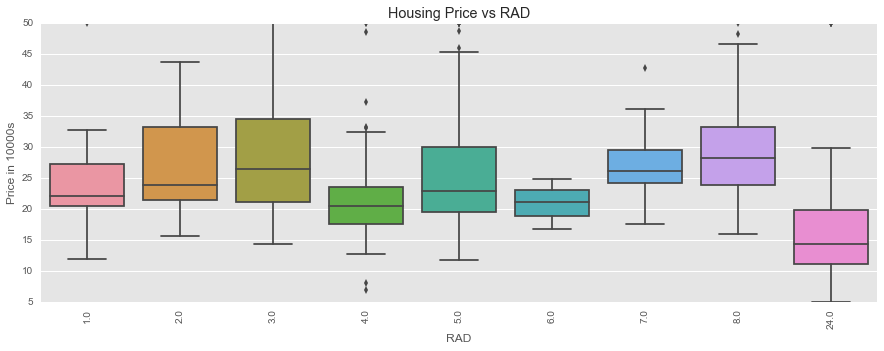

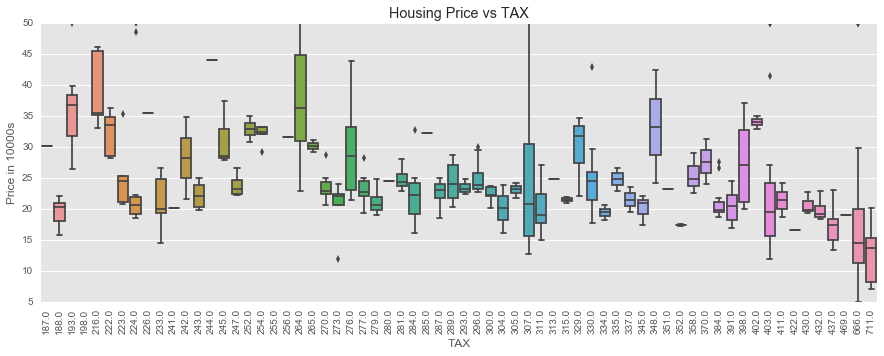

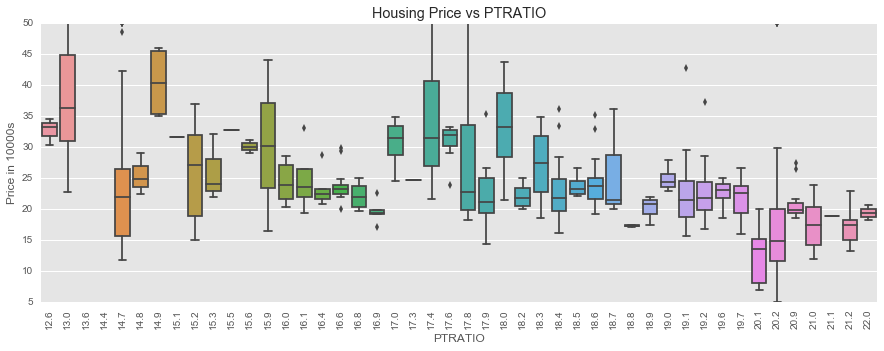

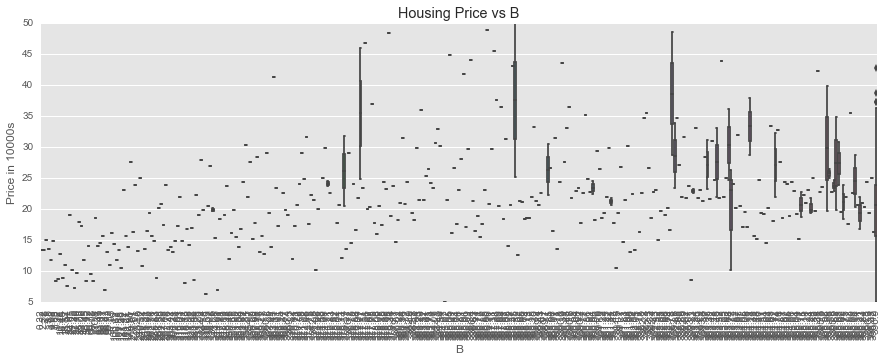

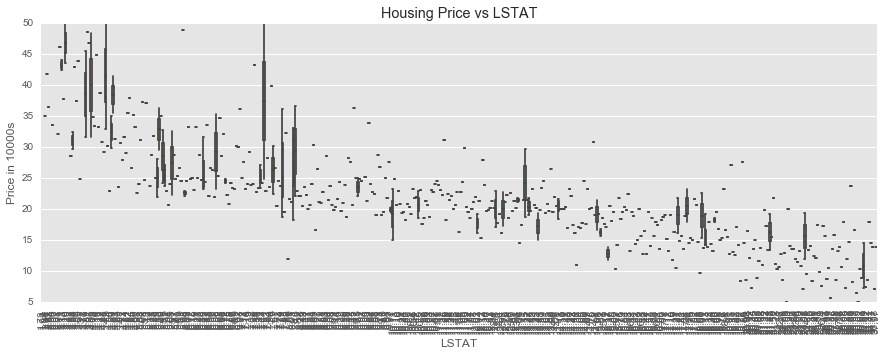

In [138]:
# plotting all of them
for feature in total_df.columns[:-1]:
    plt.figure(figsize = (15,5))
    plt.title('Housing Price vs ' + feature)
    sns.boxplot(total_df[feature],total_df['PRICE'])
    plt.xlabel(feature)
    plt.ylabel('Price in 10000s')
    plt.xticks(rotation = 90)
    plt.show()

## Conclusion:
It is very easy to see that there are negative correlations with the % lower status and Pupil teacher ratio and the strong positive correlation with the average number of rooms and the house price.

## Question 2: Using your client's feature set CLIENT_FEATURES, which values correspond with the features you've chosen above?

In [139]:
for i in range(len(total_df.columns[:-1])):
    print total_df.columns[i], ": ",CLIENT_FEATURES[0][i]

CRIM :  11.95
ZN :  0.0
INDUS :  18.1
CHAS :  0
NOX :  0.659
RM :  5.609
AGE :  90.0
DIS :  1.385
RAD :  24
TAX :  680.0
PTRATIO :  20.2
B :  332.09
LSTAT :  12.13


# 2) Making a Model

In [140]:
from sklearn import cross_validation

In [141]:
# Function to shuffle up the data
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle and split the data
    splits = cross_validation.ShuffleSplit(len(housing_features),test_size = 0.30,random_state=0)
    for train_index, test_index in splits:
        X_train = np.asarray([housing_features[i] for i in train_index])
        y_train = np.asarray([housing_prices[i] for i in train_index])
        X_test = np.asarray([housing_features[i] for i in test_index])
        y_test = np.asarray([housing_prices[i] for i in test_index])

    # Return the training and testing data subsets
    #, y_train.shape, X_test.shape, y_test.shape
    return X_train, y_train, X_test, y_test

In [142]:
X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)

## Question 3: Why do we split the data?

### Answer:
We need to train a model and then test it with data. While we don't have more data, we can certainly take some data we already have and leave part of it for testing this model. We then of course use the rest to train the model. This will also tell us how good our estimator is.

# 3) Checking Performance

In [143]:
from sklearn.metrics import mean_squared_error, make_scorer

In [144]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    error = mean_squared_error(y_true, y_predict)
    return error

In [145]:
total_error = performance_metric(y_train, y_train)

## Question 4: Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?
- Accuracy
- Precision
- Recall
- F1 Score
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)

### Answer:
For regression, the r value is the most appropriate performance metric. This corresponds to the Mean Squared Error.

# 4) Fitting

In [146]:
import sklearn
from sklearn import grid_search

In [147]:
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(estimator = regressor, param_grid = parameters, scoring = scoring_function)
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

In [148]:
reg = fit_model(housing_features, housing_prices)

## Question 5: What is the grid search algorithm and when is it applicable?

### Answer:
The grid search algorithm evaluates a given model for specified values of given parameters and determines the parameter values yielding the most accurate predictions. The grid search algorithm is applicable in cases where a classifier or regressor takes arguments determining key features of the model. So, if you have a large number of parameters to test, grid search helps to test all combinations possible at once and find the best one. This is pretty extensive haha.

## Question 6: What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

### Answer:
It is a method that validates a model. It takes subsets of legnth n, which we can choose, and trains the model using them. Then it takes the next n numbers of entries to train and so on until the end. This is ran multiple times and results are averaged. Splitting the sets into these subsets of length n, we are able to check its performance using the test set we splitted off from the original set. Cross Validation is used here because we split the training data into partitions and use one part to train and another to validate at each round.

This is helpful when using gridsearch because we evaluate different settings of paremeters over the same test data, but this doesn't help it be more general and might cause overfitting.

# 5) Decision Tree Classifier

In [149]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(15,10))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            s = int(s)
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s],
                                              regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()

In [150]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(15, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


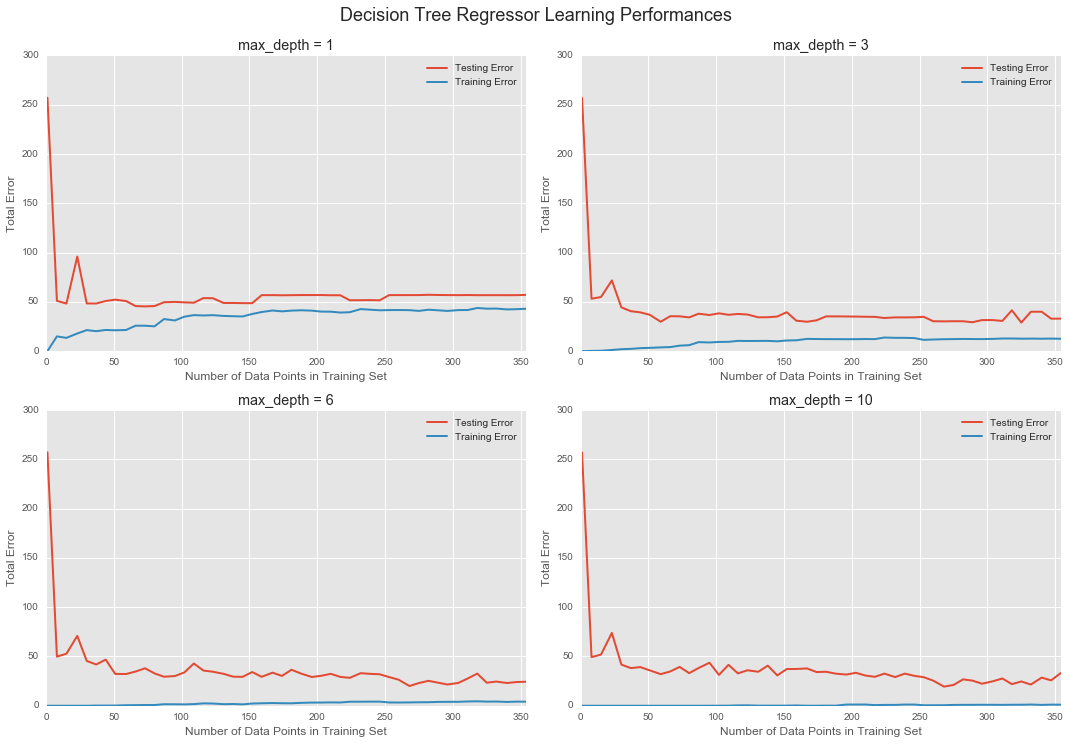

In [151]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7: Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?

### Answer:
Well max_depth of 3 shows that the test data error was low, but then around 50 the total error grew.

## Question 8: Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?

### Answer:
High Bias happens when the model pays little attention to the data and High Variance occurs when it pays too much attention to the training set. 

So, in the max_depth=1 graph, the model suffers from high bias, because it apparently is not sophisticated enough to capture the relationship between the features selected and the house prices.

When the max depth is 10, the training error is the smallest of all models tested. However, its test error looks slightly greater than the error in the max_depth=6 model. It can indicate that the model is overfitting the data and would not generalize well to new examples (high variance).

Creating a model complexity graph. . . 


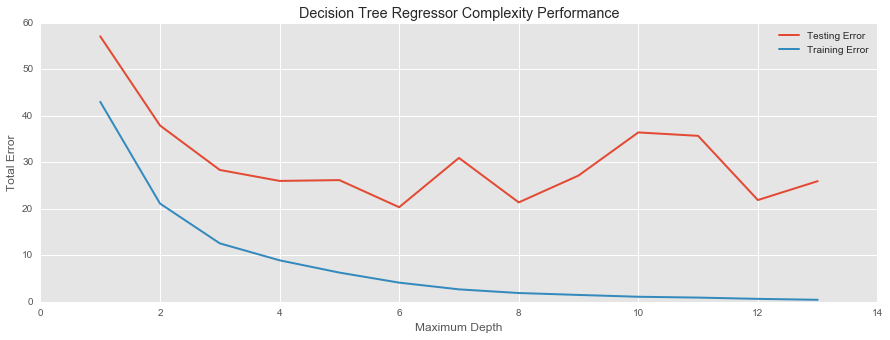

In [152]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9: From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?

### Answer: 
In the beginning, both training and test error became smaller when the maximum Depth was increasing. However, while the model complexity rose further, the training error kept going down, while the test error was increasing. In other words, in this case, when the complexity of the model increased, the variance became the primary concern while bias steadily fell.
As noticed in the last question, the maximum depth 10 had presented more Variance than the 6, which in turns apparently demonstrated less Bias than the maximum depth 4. So, I would say that the parameter that would best generalize to new instances would be the Maximum Depth 6.

# 6) Model Prediction

In [153]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

In [154]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {"max_depth":range(1,10)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [155]:
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Optimal 'max_depth' is {} for the best model.".format(reg.get_params()['max_depth'])

Optimal 'max_depth' is 1 for the best model.


In [156]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Client should sell their house for: ", sale_price[0]

Client should sell their house for:  19.5968858131


In [158]:
from sklearn.neighbors import NearestNeighbors

In [159]:
def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
   neigh = NearestNeighbors( n_neighbors = 10 )
   neigh.fit( X)
   distance, indexes = neigh.kneighbors(x)
   return indexes
indexes = find_nearest_neighbor_indexes(CLIENT_FEATURES, housing_features)
sum_prices = []
for i in indexes:
    sum_prices.append(city_data.target[i])
neighbor_avg = np.mean(sum_prices)
print "Nearest Neighbors average: " +str(neighbor_avg)

Nearest Neighbors average: 21.52


In [163]:
print "Seems like our clients house is a little less than the average house: ",total_df['PRICE'].mean()

Seems like our clients house is a little less than the average house:  22.5328063241


# 7) Conclusion:
## Final Question: In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.

### Answer:
I don't feel as confident because there could be more data and more parameters to look out for. These are still good ideas to keep in mind and perhaps with more data we can estimate better. However, it really depends on the data you have and this one doesn't make me confident enough. 

How old are the houses, how many bathrooms, and we can go on and on. I'd feel more confident if we had more data. Which is why data engineering and feature engineering is important when we don't. However, I know we can get how old the houses are, how many bathrooms and so on. Therefore, having more data in that regard would make me more confident.